
<h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #2d3e50; text-align: center; margin-top: 40px; letter-spacing: 2px;">
    Rabin-Karp Algorithm
</h1>
<hr style="border: 0; height: 2px; background: linear-gradient(to right, #6a11cb, #2575fc); width: 60%; margin: auto;">


Code is followed from the youtube video of aryan mittal

whenever see problem of comparing of finding a string in another or a vector of string , always remember three methods
1) Rabin karp
2) kmp
3) tries


<h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #2d3e50; text-align: center; margin-top: 40px; letter-spacing: 2px;">
    BRTUE FORCE METHOD
</h1>
<hr style="border: 0; height: 2px; background: linear-gradient(to right, #6a11cb, #2575fc); width: 60%; margin: auto;">

This will have time complexity 0(nm)
Because there can be a case where the heapstring will be aaaaaaaa, and needle string will be aaab , in this case only last element will differ and hence worst time complexity goes upto O(NM).



<h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #2d3e50; text-align: center; margin-top: 40px; letter-spacing: 2px;">
    Rabin-Karp Algorithm intuition and building
</h1>
<hr style="border: 0; height: 2px; background: linear-gradient(to right, #6a11cb, #2575fc); width: 60%; margin: auto;">


1) first we think to the take the element wise sum of the needle string and check the window of the main string sequentially while doing so we search on the string , and check if the sum of that elemetns become equals , but there can be <div style="color: red;">spurious hits</div> which means that we get the hit but the eleemtns are not same.

2) <div style="color: Orange;">robin carp</div>
In this approach we use the method of assigning the weight of every position in the string , and then get the sum.

this has the issuse when the needle becomes too large in this case , we will have to take the modolu , with a prime number to reduce the spurious hits, while searching.

3) we can increase the size of the hashing , and thus lower the chagne of it, we can thus recude the chances of error by 10^-10

In [ ]:
c```
// Robin Karp, author : Ritik Tiwary

#include <iostream>
using namespace std;

const int MOD = 1e9 + 3;

int hashValue(const string &s, int radix, int m) {
    int ans = 0, factor = 1;
    for (int i = m - 1; i >= 0; i--) {
        ans = (ans + ((s[i] - 'a') * 1LL * factor) % MOD) % MOD;
        factor = (factor * 1LL * radix) % MOD;
    }
    return ans;
}

class Solution {
public:
    int strStr(string haystack, string needle) {
        int n = haystack.size(), m = needle.size();
        if (n < m) return -1;

        int radix = 26;
        int max_weight = 1;
        for (int i = 1; i < m; i++) {
            max_weight = (max_weight * 1LL * radix) % MOD;
        }

        int hashNeedle = hashValue(needle, radix, m);
        int hashHay = hashValue(haystack.substr(0, m), radix, m);

        for (int i = 0; i <= n - m; i++) {
            if (i != 0) {
                // Rolling hash update
                hashHay = ((hashHay - ((haystack[i - 1] - 'a') * 1LL * max_weight) % MOD + MOD) * radix) % MOD;
                hashHay = (hashHay + (haystack[i + m - 1] - 'a')) % MOD;
            }

            if (hashHay == hashNeedle) {
                // Double-check to avoid false positives due to hash collisions
                bool match = true;
                for (int j = 0; j < m; j++) {
                    if (haystack[i + j] != needle[j]) {
                        match = false;
                        break;
                    }
                }
                if (match) return i;
            }
        }

        return -1;
    }
};

```


<h1 style="font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #2d3e50; text-align: center; margin-top: 40px; letter-spacing: 2px;">
    KMP algorithm
</h1>
<hr style="border: 0; height: 2px; background: linear-gradient(to right, #6a11cb, #2575fc); width: 60%; margin: auto;">


1) Time complexity = worst O(2*N)
2) Space complexity = O(N+M)

![Screenshot 2025-05-31 125805.png](<attachment:Screenshot 2025-05-31 125805.png>)
Dry run
![Screenshot 2025-05-31 125818.png](<attachment:Screenshot 2025-05-31 125818.png>)
Pseudo code
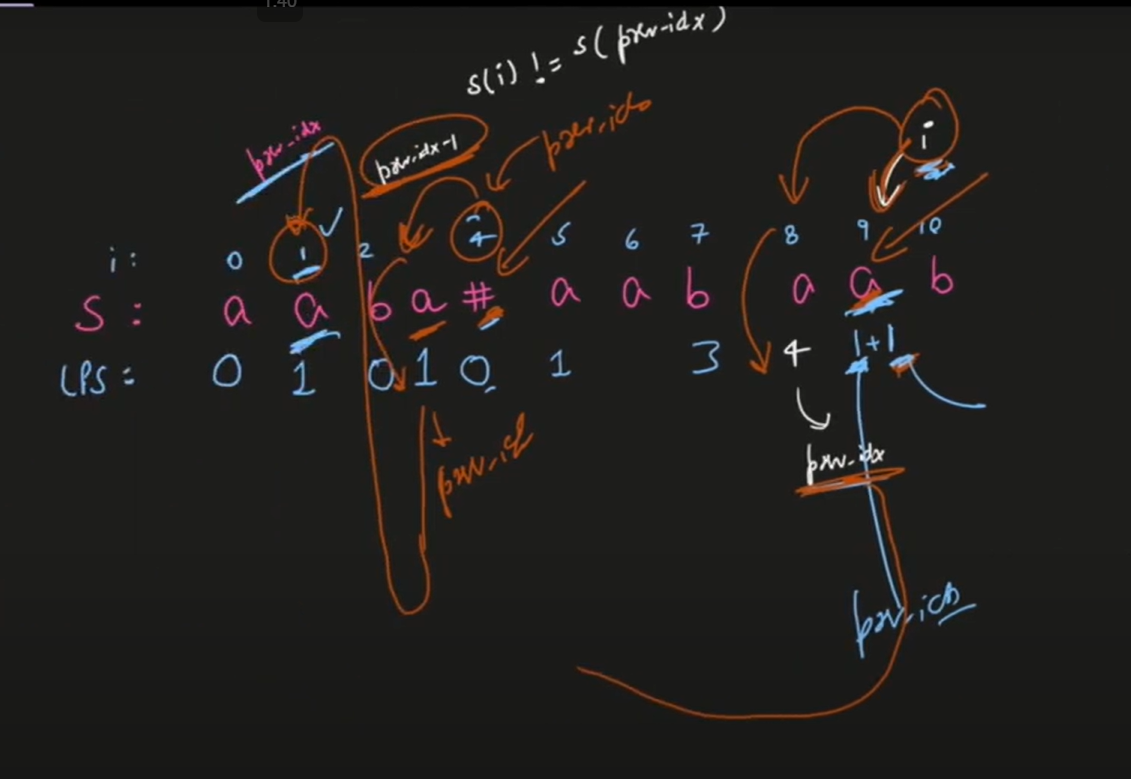
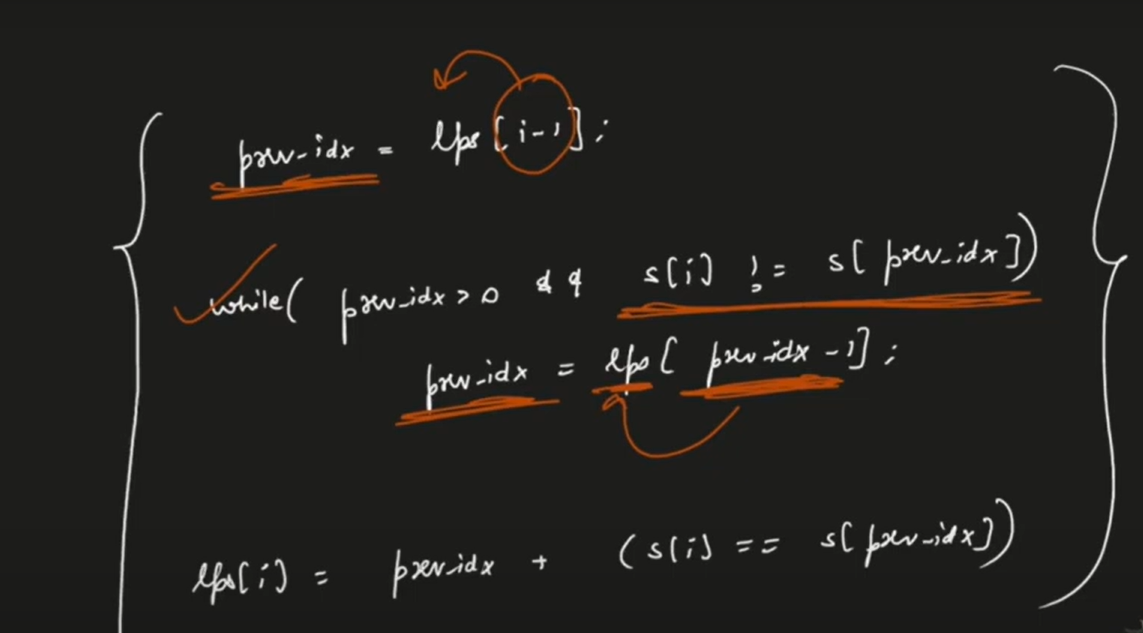